# B. classification
Author: Shanshan Yang, Bioinformatics Core, ASU
Time: Dec 11, 2017

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datafile="B.classification.csv"
data=pd.read_csv(datafile)
data.head()

,gene,pheno,mstatus,gene1,gene2,gene3,gene4,gene5,gene6,gene7,...,gene78,gene79,gene80,gene81,gene82,gene83,gene84,gene85,gene86,gene87
0,cellline1,102.800,2,35.563389,12618.769920,0.380812,83.539161,24616.88273,507.121965,33.113287,...,1664.275029,9884.085946,9967.348993,0.180494,1925.264711,21447.89539,440.137272,8334.957054,10.725748,29.126002
1,cellline2,1.007,2,2.412029,15493.175530,324.463153,81.020538,11889.10427,307.848156,43.459984,...,2102.489421,20784.919950,11924.561280,17.737673,1624.761674,17661.26251,8.204143,4742.916507,123.666991,28.482386
2,cellline3,248.300,1,11.895738,4164.217113,2.609915,180.803666,22294.39146,359.055020,14.090481,...,1430.476500,12276.371810,7596.776712,1.253727,189.370291,11493.70647,578.183845,5957.650724,17.089377,44.979818
3,cellline4,8.200,2,10.841646,11167.453320,619.654523,1.607177,39831.41843,409.473237,0.051204,...,1645.797712,15493.633420,14700.996270,18.169115,514.287852,14091.65444,2.374032,4547.726810,120.232935,8.231084
4,cellline5,9.140,1,35.091377,6418.275182,1051.428133,113.379095,11214.43702,516.293687,175.544484,...,2521.399818,15978.260150,12423.272770,17.881719,1228.890831,17383.92604,74.218717,9324.497865,114.755041,58.974125


# onehot encoding for categorical variables

In [3]:
# Create a new variable for every unique value of TP53mstatus
mstatus = pd.get_dummies( data.mstatus , prefix='mstatus' )
mstatus

,mstatus_0,mstatus_1,mstatus_2
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,0,0,1


In [11]:
mstatus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
mstatus_0    17 non-null uint8
mstatus_1    17 non-null uint8
mstatus_2    17 non-null uint8
dtypes: uint8(3)
memory usage: 123.0 bytes


In [12]:
mstatus['mstatus_0']=mstatus['mstatus_0'].astype('category')
mstatus['mstatus_1']=mstatus['mstatus_1'].astype('category')
mstatus['mstatus_2']=mstatus['mstatus_2'].astype('category')

In [4]:
# add back to original data matrix
data=pd.concat([mstatus,data],axis=1)
data

,mstatus_0,mstatus_1,mstatus_2,gene,pheno,mstatus,gene1,gene2,gene3,gene4,...,gene78,gene79,gene80,gene81,gene82,gene83,gene84,gene85,gene86,gene87
0,0,0,1,cellline1,102.800,2,35.563389,12618.769920,0.380812,83.539161,...,1664.275029,9884.085946,9967.348993,0.180494,1925.264711,21447.89539,440.137272,8334.957054,10.725748,29.126002
1,0,0,1,cellline2,1.007,2,2.412029,15493.175530,324.463153,81.020538,...,2102.489421,20784.919950,11924.561280,17.737673,1624.761674,17661.26251,8.204143,4742.916507,123.666991,28.482386
2,0,1,0,cellline3,248.300,1,11.895738,4164.217113,2.609915,180.803666,...,1430.476500,12276.371810,7596.776712,1.253727,189.370291,11493.70647,578.183845,5957.650724,17.089377,44.979818
3,0,0,1,cellline4,8.200,2,10.841646,11167.453320,619.654523,1.607177,...,1645.797712,15493.633420,14700.996270,18.169115,514.287852,14091.65444,2.374032,4547.726810,120.232935,8.231084
4,0,1,0,cellline5,9.140,1,35.091377,6418.275182,1051.428133,113.379095,...,2521.399818,15978.260150,12423.272770,17.881719,1228.890831,17383.92604,74.218717,9324.497865,114.755041,58.974125
5,0,0,1,cellline6,110.400,2,17.183818,12482.024900,269.561811,51.533824,...,706.746609,7576.531063,4248.833977,14.982130,681.371465,8793.60973,1.656686,3500.790305,15.520336,55.060588
6,1,0,0,cellline7,41.880,0,0.371414,20549.792360,2.487057,307.895894,...,1290.303312,11198.139500,9234.434085,0.058224,730.706882,12951.75096,456.451955,5240.821567,3.955019,72.644239
7,0,1,0,cellline8,63.390,1,45.146636,7189.947832,411.563472,178.920283,...,1617.006495,12001.325160,11649.730500,0.517588,663.610145,21936.46752,74.244456,6125.073377,183.751932,18.223628
8,0,0,1,cellline9,75.680,2,11.990382,9149.985952,164.285280,94.617134,...,1428.388276,10226.198160,9327.724256,0.886400,591.754297,13540.44950,74.325502,4974.957898,0.310012,96.512793
9,0,0,1,cellline10,44.050,2,11.626690,11830.781570,0.358404,76.789411,...,628.281564,6629.017964,3095.952456,4.479230,686.023868,19208.27344,431.874493,3349.225674,11.499536,75.489329


# Seperate y and x matrix, drop vaiables not needed

# map continuous y to category (change regression to classification)

In [5]:
data['pheno_cat']=data['pheno'].map( lambda s : 1 if s < 20 else 0 )
y=data['pheno_cat']
gene=data['gene']
x=data.drop(['gene','pheno','pheno_cat','mstatus'],axis=1)
x_num=data.drop(['gene','pheno','pheno_cat','mstatus','mstatus_0','mstatus_1','mstatus_2'],axis=1)
matrix=data.drop(['gene','pheno','mstatus'],axis=1)

# Data explore

In [6]:
x.info() # check whether have NAs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 90 columns):
mstatus_0    17 non-null uint8
mstatus_1    17 non-null uint8
mstatus_2    17 non-null uint8
gene1        17 non-null float64
gene2        17 non-null float64
gene3        17 non-null float64
gene4        17 non-null float64
gene5        17 non-null float64
gene6        17 non-null float64
gene7        17 non-null float64
gene8        17 non-null float64
gene9        17 non-null float64
gene10       17 non-null float64
gene11       17 non-null float64
gene12       17 non-null float64
gene13       17 non-null float64
gene14       17 non-null float64
gene15       17 non-null float64
gene16       17 non-null float64
gene17       17 non-null float64
gene18       17 non-null float64
gene19       17 non-null float64
gene20       17 non-null float64
gene21       17 non-null float64
gene22       17 non-null float64
gene23       17 non-null float64
gene24       17 non-null float64
gene25      

In [9]:
x['mstatus_0']=x['mstatus_0'].astype('category')
x['mstatus_1']=x['mstatus_1'].astype('category')
x['mstatus_2']=x['mstatus_2'].astype('category')

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 90 columns):
mstatus_0    17 non-null category
mstatus_1    17 non-null category
mstatus_2    17 non-null category
gene1        17 non-null float64
gene2        17 non-null float64
gene3        17 non-null float64
gene4        17 non-null float64
gene5        17 non-null float64
gene6        17 non-null float64
gene7        17 non-null float64
gene8        17 non-null float64
gene9        17 non-null float64
gene10       17 non-null float64
gene11       17 non-null float64
gene12       17 non-null float64
gene13       17 non-null float64
gene14       17 non-null float64
gene15       17 non-null float64
gene16       17 non-null float64
gene17       17 non-null float64
gene18       17 non-null float64
gene19       17 non-null float64
gene20       17 non-null float64
gene21       17 non-null float64
gene22       17 non-null float64
gene23       17 non-null float64
gene24       17 non-null float64
gen

In [8]:
data.describe() # check distribution

,mstatus_0,mstatus_1,mstatus_2,pheno,mstatus,gene1,gene2,gene3,gene4,gene5,...,gene79,gene80,gene81,gene82,gene83,gene84,gene85,gene86,gene87,pheno_cat
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.235294,0.176471,0.588235,85.932176,1.352941,17.981299,11940.921945,215.062133,118.675791,18508.949853,...,12569.398576,8839.291905,6.060689,832.874955,16008.439315,359.429237,4873.344150,47.333784,52.108468,0.352941
std,0.437237,0.392953,0.507300,96.755571,0.861770,12.598904,4836.929875,327.081614,80.245059,8942.765880,...,4406.193937,3339.915409,8.008130,458.638295,5128.941717,335.013301,1887.238831,58.210639,26.913396,0.492592
min,0.000000,0.000000,0.000000,1.007000,0.000000,0.371414,4164.217113,0.274555,0.132118,5032.240744,...,6629.017964,3089.205933,0.000000,189.370291,7460.053760,0.203818,1468.491177,0.310012,8.231084,0.000000
25%,0.000000,0.000000,0.000000,9.570000,1.000000,11.626690,9149.985952,1.210296,81.020538,11214.437020,...,9884.085946,7245.659314,0.186814,591.754297,12951.750960,74.218717,3982.293889,9.473663,29.126002,0.000000
50%,0.000000,0.000000,1.000000,49.090000,2.000000,13.970087,11167.453320,2.609915,94.617134,18834.957130,...,12001.325160,9327.724256,1.253727,681.371465,14091.654440,431.874493,4742.916507,14.927268,55.060588,0.000000
75%,0.000000,0.000000,1.000000,105.920000,2.000000,24.595825,15493.175530,324.463153,178.920283,23444.097860,...,15493.633420,11551.979880,14.982130,1111.175871,19208.273440,537.708645,5268.234115,112.458372,72.644239,1.000000
max,1.000000,1.000000,1.000000,290.400000,2.000000,45.146636,21835.587420,1051.428133,307.895894,39831.418430,...,20784.919950,14700.996270,20.425984,1925.264711,25722.499280,1120.277218,9324.497865,183.751932,98.453777,1.000000


# visualization of variables and features
# distribution plot

In [12]:
import seaborn as sns


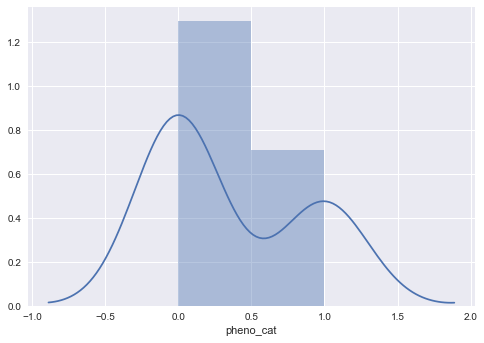

In [13]:
sns.distplot(y)

# Heatmap and correlation coefficient

In [27]:
corr = matrix.corr()

print (corr['pheno_cat'].sort_values(ascending=False)[:11], '\n')
print (corr['pheno_cat'].sort_values(ascending=False)[-10:])

(pheno_cat    1.000000
gene22       0.703147
gene79       0.635632
gene81       0.604509
gene42       0.589438
gene3        0.585379
gene62       0.576375
gene80       0.572827
gene47       0.551429
gene66       0.525566
gene15       0.522567
Name: pheno_cat, dtype: float64, '\n')
gene48      -0.163747
gene12      -0.219666
gene28      -0.230907
gene33      -0.240243
gene69      -0.240599
gene4       -0.242297
gene18      -0.256976
gene20      -0.259309
gene84      -0.268074
mstatus_0   -0.409673
Name: pheno_cat, dtype: float64


In [28]:
def plot_correlation_map( df ):
    corr = matrix.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        #annot = True, 
        #annot_kws = { 'fontsize' : 12 }
    )

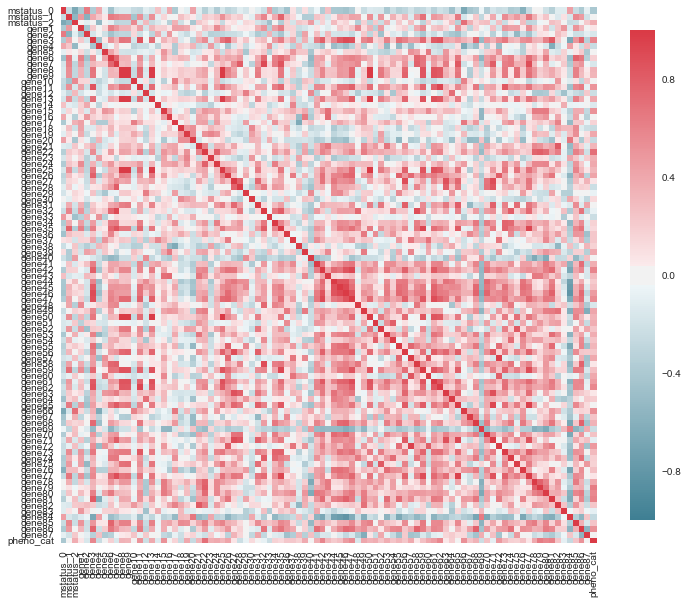

In [29]:
plot_correlation_map( matrix )

# Standardize numerical variables

In [ ]:
# no need for standardization for random forest classification

In [13]:
x_num=data.drop(['gene','pheno','pheno_cat','mstatus','mstatus_0','mstatus_1','mstatus_2'],axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(x_num)
x_std = scalerX.transform(x_num)
#print x_std

In [15]:
col_names = list(x_num)
print col_names
x_features = pd.DataFrame(x_std, columns = col_names)
x_features.head()

['gene1', 'gene2', 'gene3', 'gene4', 'gene5', 'gene6', 'gene7', 'gene8', 'gene9', 'gene10', 'gene11', 'gene12', 'gene13', 'gene14', 'gene15', 'gene16', 'gene17', 'gene18', 'gene19', 'gene20', 'gene21', 'gene22', 'gene23', 'gene24', 'gene25', 'gene26', 'gene27', 'gene28', 'gene29', 'gene30', 'gene31', 'gene32', 'gene33', 'gene34', 'gene35', 'gene36', 'gene37', 'gene38', 'gene39', 'gene40', 'gene41', 'gene42', 'gene43', 'gene44', 'gene45', 'gene46', 'gene47', 'gene48', 'gene49', 'gene50', 'gene51', 'gene52', 'gene53', 'gene54', 'gene55', 'gene56', 'gene57', 'gene58', 'gene59', 'gene60', 'gene61', 'gene62', 'gene63', 'gene64', 'gene65', 'gene66', 'gene67', 'gene68', 'gene69', 'gene70', 'gene71', 'gene72', 'gene73', 'gene74', 'gene75', 'gene76', 'gene77', 'gene78', 'gene79', 'gene80', 'gene81', 'gene82', 'gene83', 'gene84', 'gene85', 'gene86', 'gene87']


,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene78,gene79,gene80,gene81,gene82,gene83,gene84,gene85,gene86,gene87
0,1.438474,0.144453,-0.676554,-0.451343,0.704023,1.235369,-0.250141,-0.262056,-0.255102,2.331508,...,0.449070,-0.628197,0.348145,-0.756877,2.455115,1.093181,0.248324,1.890672,-0.648244,-0.880223
1,-1.273796,0.757005,0.344770,-0.483695,-0.763028,0.047726,-0.147672,-0.249421,-0.255579,-0.383586,...,1.229998,1.921923,0.952187,1.503017,1.779743,0.332172,-1.080657,-0.071237,1.351685,-0.904873
2,-0.497889,-1.657259,-0.669529,0.798055,0.436324,0.352911,-0.438533,-0.273704,-0.276348,-1.116267,...,0.032425,-0.068550,-0.383469,-0.618734,-1.446258,-0.907337,0.673069,0.592229,-0.535559,-0.273026
3,-0.584129,-0.164830,1.275047,-1.503788,2.457707,0.653397,-0.577571,-0.133307,-0.275905,-0.253917,...,0.416142,0.684090,1.809060,1.558551,-0.716015,-0.385221,-1.098595,-0.177846,1.290876,-1.680493
4,1.399857,-1.176906,2.635753,-0.068038,-0.840793,1.290031,1.160428,3.997331,3.994326,-1.045703,...,1.976525,0.797462,1.106101,1.521559,0.890034,0.276435,-0.877542,2.431141,1.193875,0.262953


In [16]:
x_features=pd.concat([mstatus,x_features],axis=1)
x_features

,mstatus_0,mstatus_1,mstatus_2,gene1,gene2,gene3,gene4,gene5,gene6,gene7,...,gene78,gene79,gene80,gene81,gene82,gene83,gene84,gene85,gene86,gene87
0,0,0,1,1.438474,0.144453,-0.676554,-0.451343,0.704023,1.235369,-0.250141,...,0.449070,-0.628197,0.348145,-0.756877,2.455115,1.093181,0.248324,1.890672,-0.648244,-0.880223
1,0,0,1,-1.273796,0.757005,0.344770,-0.483695,-0.763028,0.047726,-0.147672,...,1.229998,1.921923,0.952187,1.503017,1.779743,0.332172,-1.080657,-0.071237,1.351685,-0.904873
2,0,1,0,-0.497889,-1.657259,-0.669529,0.798055,0.436324,0.352911,-0.438533,...,0.032425,-0.068550,-0.383469,-0.618734,-1.446258,-0.907337,0.673069,0.592229,-0.535559,-0.273026
3,0,0,1,-0.584129,-0.164830,1.275047,-1.503788,2.457707,0.653397,-0.577571,...,0.416142,0.684090,1.809060,1.558551,-0.716015,-0.385221,-1.098595,-0.177846,1.290876,-1.680493
4,0,1,0,1.399857,-1.176906,2.635753,-0.068038,-0.840793,1.290031,1.160428,...,1.976525,0.797462,1.106101,1.521559,0.890034,0.276435,-0.877542,2.431141,1.193875,0.262953
5,0,0,1,-0.065246,0.115312,0.171752,-0.862463,-1.553376,-0.734681,-0.562538,...,-1.257310,-1.168022,-1.416723,1.148334,-0.340500,-1.449983,-1.100803,-0.749665,-0.563343,0.113065
6,1,0,0,-1.440749,1.834598,-0.669917,2.430600,-1.317385,-0.693931,0.138479,...,-0.217373,-0.320790,0.121950,-0.772615,-0.229620,-0.614310,0.298522,0.200710,-0.768138,0.786515
7,0,1,0,2.222526,-1.012459,0.619261,0.773862,0.827537,2.538710,3.133539,...,0.364835,-0.132894,0.867367,-0.713487,-0.380418,1.191371,-0.877463,0.683672,2.415651,-1.297781
8,0,0,1,-0.490145,-0.594764,-0.160020,-0.309042,1.318473,0.752538,1.656796,...,0.028704,-0.548164,0.150742,-0.666015,-0.541912,-0.495998,-0.877214,0.055500,-0.832683,1.700675
9,0,0,1,-0.519901,-0.023472,-0.676625,-0.538045,-1.075514,-1.023535,-0.418426,...,-1.397140,-1.389681,-1.772530,-0.203560,-0.330044,0.643079,0.222901,-0.832447,-0.634542,0.895481


In [17]:
y_std=y

# Seperate data into train and test

In [18]:
from sklearn.cross_validation import *

def train_and_evaluate(clf, X_train, y_train):
    cv = KFold(X_train.shape[0], 5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print ('Average coefficient of determination using 5-fold cross validation:', np.mean(scores))

/Users/shanshanyang/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Feature selection
# modeling before feature selection

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3, min_samples_leaf=5,n_estimators=100)
train_and_evaluate(rfc,x,y)

('Average coefficient of determination using 5-fold cross validation:', 0.66666666666666663)


In [20]:
train_and_evaluate(rfc,x_features,y_std)

('Average coefficient of determination using 5-fold cross validation:', 0.66666666666666663)


# Feature selection begin

# Feature selection by random forest importance

 1) gene80                         0.064684
 2) gene11                         0.044370
 3) gene7                          0.041469
 4) gene42                         0.040682
 5) gene22                         0.037366
 6) gene79                         0.036462
 7) gene69                         0.031680
 8) gene39                         0.028793
 9) gene62                         0.027032
10) gene72                         0.024817
11) gene23                         0.022711
12) gene31                         0.020742
13) gene46                         0.020489
14) gene55                         0.020398
15) gene71                         0.020335
16) gene53                         0.019974
17) gene86                         0.019755
18) gene6                          0.019231
19) gene81                         0.018288
20) gene51                         0.017927
21) gene17                         0.017908
22) gene47                         0.017875
23) gene78                      

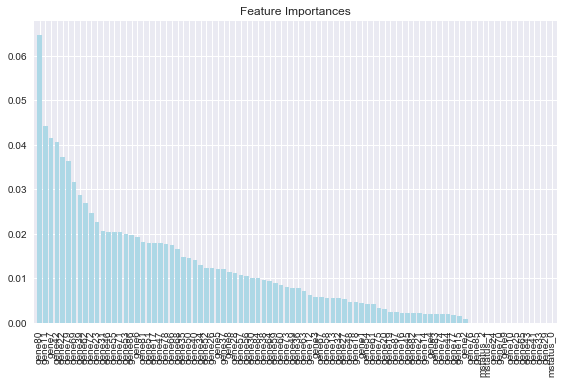

In [21]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = x.columns[0:]

forest = RandomForestClassifier(n_estimators=100,
                                random_state=0,
                                n_jobs=-1)

forest.fit(x, y)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(x_features.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(x.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(x.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [22]:
forest = forest.fit(x, y)

In [23]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(forest, prefit=True)
x_subsets_0 = selector.transform(x)
idxs_selected=selector.get_support()
labels = x.columns[idxs_selected]
x_subsets_0=pd.DataFrame(x_subsets_0, columns=labels)
x_subsets_0
print labels

Index([u'gene5', u'gene6', u'gene7', u'gene8', u'gene11', u'gene17', u'gene22',
       u'gene23', u'gene26', u'gene28', u'gene31', u'gene34', u'gene35',
       u'gene37', u'gene39', u'gene40', u'gene42', u'gene46', u'gene47',
       u'gene50', u'gene51', u'gene52', u'gene53', u'gene55', u'gene62',
       u'gene66', u'gene68', u'gene69', u'gene71', u'gene72', u'gene78',
       u'gene79', u'gene80', u'gene81', u'gene86'],
      dtype='object')


In [24]:
x_subsets_0

,gene5,gene6,gene7,gene8,gene11,gene17,gene22,gene23,gene26,gene28,...,gene66,gene68,gene69,gene71,gene72,gene78,gene79,gene80,gene81,gene86
0,24616.882730,507.121965,33.113287,1.872366,0.000000,355.992343,381.771416,112.540158,7.155964,0.000000,...,1829.559917,48.724483,54.666330,18.990077,0.932670,1664.275029,9884.085946,9967.348993,0.180494,10.725748
1,11889.104270,307.848156,43.459984,3.903626,3.728302,280.125569,461.684201,51.501824,7.187581,7.414297,...,1721.916413,171.617876,0.000000,1.049774,7.574311,2102.489421,20784.919950,11924.561280,17.737673,123.666991
2,22294.391460,359.055020,14.090481,0.000000,0.754708,99.338788,276.901237,168.440576,3.368073,1.931817,...,1156.755256,13.214744,31.580594,16.840515,0.160708,1430.476500,12276.371810,7596.776712,1.253727,17.089377
3,39831.418430,409.473237,0.051204,22.569492,3.625660,174.663149,385.075970,76.421466,114.926339,1.148442,...,1633.818172,125.919430,2.952763,0.261735,33.236943,1645.797712,15493.633420,14700.996270,18.169115,120.232935
4,11214.437020,516.293687,175.544484,686.590180,26.752111,286.468321,506.957655,93.836650,99.341986,3.144239,...,1549.144961,143.048764,6.989222,251.183858,6.675416,2521.399818,15978.260150,12423.272770,17.881719,114.755041
5,5032.240744,176.568608,1.569169,10.710532,0.000000,424.437755,145.365462,47.901209,50.646195,0.262773,...,1982.789612,147.689713,39.339566,5.641386,4.347309,706.746609,7576.531063,4248.833977,14.982130,15.520336
6,7079.635161,183.406174,72.353869,0.000000,0.252355,169.262727,225.968047,97.691572,2.570058,5.694864,...,376.790338,7.842055,29.375955,49.965914,0.312417,1290.303312,11198.139500,9234.434085,0.058224,3.955019
7,25688.460820,725.808594,374.778085,7.968790,13.634660,325.341969,248.441013,40.647865,24.252006,18.636545,...,986.034243,272.998199,6.875733,190.474292,0.180915,1617.006495,12001.325160,11649.730500,0.517588,183.751932
8,29947.698990,426.108074,225.664922,4.737565,3.501571,142.726975,214.042162,43.229987,20.633431,30.134704,...,1557.842682,56.301952,9.421854,390.440028,4.307026,1428.388276,10226.198160,9327.724256,0.886400,0.310012
9,9178.049873,128.102024,16.120752,0.000000,1.611854,239.985693,74.999562,20.108970,0.568929,0.955794,...,1901.177614,78.588255,121.044681,0.156302,0.000000,628.281564,6629.017964,3095.952456,4.479230,11.499536


# Get feature subsets by chi2_KBest

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#x_select=SelectKBest(chi2, k=20).fit_transform(x,y)
def KBest_selector(x,y):
    #columns = data.columns
    selector = SelectKBest(chi2, k=20)
    selector.fit_transform(x,y)
    idxs_selected=selector.get_support()
    labels = x.columns[idxs_selected]
    print labels
    return pd.DataFrame(selector.fit_transform(x,y), columns=labels)
x_subsets_3=KBest_selector(x_subsets_0,y)


Index([u'gene8', u'gene22', u'gene26', u'gene34', u'gene35', u'gene37',
       u'gene39', u'gene42', u'gene46', u'gene47', u'gene50', u'gene51',
       u'gene53', u'gene55', u'gene66', u'gene68', u'gene78', u'gene79',
       u'gene80', u'gene86'],
      dtype='object')


In [31]:
x_subsets_3.shape

(17, 20)

# Assign new data matrix

In [32]:
x_subsets_3

,gene8,gene22,gene26,gene34,gene35,gene37,gene39,gene42,gene46,gene47,gene50,gene51,gene53,gene55,gene66,gene68,gene78,gene79,gene80,gene86
0,1.872366,381.771416,7.155964,708.035744,30.809819,3.312752,11654.576650,14.142403,0.895891,8.238494,1.828416,6.511878,91.624426,0.000000,1829.559917,48.724483,1664.275029,9884.085946,9967.348993,10.725748
1,3.903626,461.684201,7.187581,852.744807,148.570549,52.183620,7938.115290,639.259659,2235.352060,268.506642,4.265134,1231.451075,208.176852,40.006566,1721.916413,171.617876,2102.489421,20784.919950,11924.561280,123.666991
2,0.000000,276.901237,3.368073,655.083899,44.242871,3.216684,5339.856250,7.271472,1.631896,15.344574,0.000000,12.576129,13.226528,0.081165,1156.755256,13.214744,1430.476500,12276.371810,7596.776712,17.089377
3,22.569492,385.075970,114.926339,521.698091,40.679882,1028.099882,15252.921860,567.021025,2800.768892,336.215432,0.000000,37.010733,61.226199,301.734742,1633.818172,125.919430,1645.797712,15493.633420,14700.996270,120.232935
4,686.590180,506.957655,99.341986,973.483280,1404.405461,416.163441,8386.198870,774.252037,3410.725147,591.527261,3033.211879,21.774437,181.592682,112.465761,1549.144961,143.048764,2521.399818,15978.260150,12423.272770,114.755041
5,10.710532,145.365462,50.646195,559.695574,33.222655,0.405407,7270.634718,111.408635,2022.097532,44.886022,0.211422,21.318328,109.733907,261.012620,1982.789612,147.689713,706.746609,7576.531063,4248.833977,15.520336
6,0.000000,225.968047,2.570058,435.767650,14.141148,0.145512,12699.184160,19.910350,29.529527,18.778525,0.300882,0.720704,43.853509,0.000000,376.790338,7.842055,1290.303312,11198.139500,9234.434085,3.955019
7,7.968790,248.441013,24.252006,1660.549344,1467.058522,324.411249,5848.396437,101.625153,2340.481234,235.919025,0.000000,0.000000,63.136791,153.844289,986.034243,272.998199,1617.006495,12001.325160,11649.730500,183.751932
8,4.737565,214.042162,20.633431,1163.505421,340.252313,0.116760,7045.449232,547.051984,2538.922872,269.835657,0.000000,0.000000,113.597563,20.368718,1557.842682,56.301952,1428.388276,10226.198160,9327.724256,0.310012
9,0.000000,74.999562,0.568929,421.155425,54.579166,0.151923,6390.166666,7.456835,0.915075,44.655927,0.239529,0.569970,157.396826,0.367492,1901.177614,78.588255,628.281564,6629.017964,3095.952456,11.499536


In [33]:
subset_matrix=pd.concat([gene,y,mstatus,x_subsets_3],axis=1)
subset_matrix_1=pd.concat([mstatus,x_subsets_3],axis=1)
subset_matrix

,gene,pheno_cat,mstatus_0,mstatus_1,mstatus_2,gene8,gene22,gene26,gene34,gene35,...,gene50,gene51,gene53,gene55,gene66,gene68,gene78,gene79,gene80,gene86
0,cellline1,0,0,0,1,1.872366,381.771416,7.155964,708.035744,30.809819,...,1.828416,6.511878,91.624426,0.000000,1829.559917,48.724483,1664.275029,9884.085946,9967.348993,10.725748
1,cellline2,1,0,0,1,3.903626,461.684201,7.187581,852.744807,148.570549,...,4.265134,1231.451075,208.176852,40.006566,1721.916413,171.617876,2102.489421,20784.919950,11924.561280,123.666991
2,cellline3,0,0,1,0,0.000000,276.901237,3.368073,655.083899,44.242871,...,0.000000,12.576129,13.226528,0.081165,1156.755256,13.214744,1430.476500,12276.371810,7596.776712,17.089377
3,cellline4,1,0,0,1,22.569492,385.075970,114.926339,521.698091,40.679882,...,0.000000,37.010733,61.226199,301.734742,1633.818172,125.919430,1645.797712,15493.633420,14700.996270,120.232935
4,cellline5,1,0,1,0,686.590180,506.957655,99.341986,973.483280,1404.405461,...,3033.211879,21.774437,181.592682,112.465761,1549.144961,143.048764,2521.399818,15978.260150,12423.272770,114.755041
5,cellline6,0,0,0,1,10.710532,145.365462,50.646195,559.695574,33.222655,...,0.211422,21.318328,109.733907,261.012620,1982.789612,147.689713,706.746609,7576.531063,4248.833977,15.520336
6,cellline7,0,1,0,0,0.000000,225.968047,2.570058,435.767650,14.141148,...,0.300882,0.720704,43.853509,0.000000,376.790338,7.842055,1290.303312,11198.139500,9234.434085,3.955019
7,cellline8,0,0,1,0,7.968790,248.441013,24.252006,1660.549344,1467.058522,...,0.000000,0.000000,63.136791,153.844289,986.034243,272.998199,1617.006495,12001.325160,11649.730500,183.751932
8,cellline9,0,0,0,1,4.737565,214.042162,20.633431,1163.505421,340.252313,...,0.000000,0.000000,113.597563,20.368718,1557.842682,56.301952,1428.388276,10226.198160,9327.724256,0.310012
9,cellline10,0,0,0,1,0.000000,74.999562,0.568929,421.155425,54.579166,...,0.239529,0.569970,157.396826,0.367492,1901.177614,78.588255,628.281564,6629.017964,3095.952456,11.499536


# Clustering by features

[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]


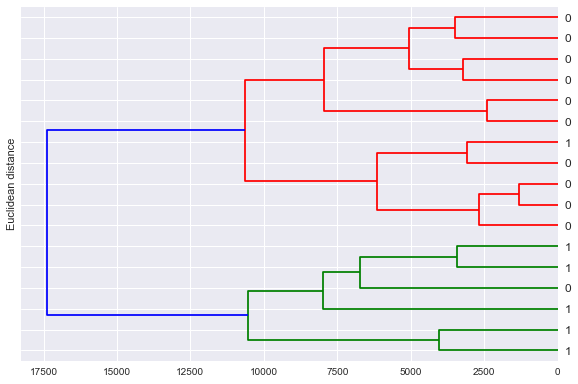

In [34]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
labels=list(subset_matrix['pheno_cat'])
print labels

row_dist = pdist(subset_matrix_1, metric='euclidean')
row_dist

from scipy.cluster.hierarchy import linkage, dendrogram
row_clusters = linkage(row_dist, method='complete', metric='euclidean')

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       orientation='left'
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('./figures/dendrogram.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

In [37]:
x_subsets_new_allm=pd.concat([mstatus,x_subsets_3],axis=1)
x_subsets_new_allm

,mstatus_0,mstatus_1,mstatus_2,gene8,gene22,gene26,gene34,gene35,gene37,gene39,...,gene50,gene51,gene53,gene55,gene66,gene68,gene78,gene79,gene80,gene86
0,0,0,1,1.872366,381.771416,7.155964,708.035744,30.809819,3.312752,11654.576650,...,1.828416,6.511878,91.624426,0.000000,1829.559917,48.724483,1664.275029,9884.085946,9967.348993,10.725748
1,0,0,1,3.903626,461.684201,7.187581,852.744807,148.570549,52.183620,7938.115290,...,4.265134,1231.451075,208.176852,40.006566,1721.916413,171.617876,2102.489421,20784.919950,11924.561280,123.666991
2,0,1,0,0.000000,276.901237,3.368073,655.083899,44.242871,3.216684,5339.856250,...,0.000000,12.576129,13.226528,0.081165,1156.755256,13.214744,1430.476500,12276.371810,7596.776712,17.089377
3,0,0,1,22.569492,385.075970,114.926339,521.698091,40.679882,1028.099882,15252.921860,...,0.000000,37.010733,61.226199,301.734742,1633.818172,125.919430,1645.797712,15493.633420,14700.996270,120.232935
4,0,1,0,686.590180,506.957655,99.341986,973.483280,1404.405461,416.163441,8386.198870,...,3033.211879,21.774437,181.592682,112.465761,1549.144961,143.048764,2521.399818,15978.260150,12423.272770,114.755041
5,0,0,1,10.710532,145.365462,50.646195,559.695574,33.222655,0.405407,7270.634718,...,0.211422,21.318328,109.733907,261.012620,1982.789612,147.689713,706.746609,7576.531063,4248.833977,15.520336
6,1,0,0,0.000000,225.968047,2.570058,435.767650,14.141148,0.145512,12699.184160,...,0.300882,0.720704,43.853509,0.000000,376.790338,7.842055,1290.303312,11198.139500,9234.434085,3.955019
7,0,1,0,7.968790,248.441013,24.252006,1660.549344,1467.058522,324.411249,5848.396437,...,0.000000,0.000000,63.136791,153.844289,986.034243,272.998199,1617.006495,12001.325160,11649.730500,183.751932
8,0,0,1,4.737565,214.042162,20.633431,1163.505421,340.252313,0.116760,7045.449232,...,0.000000,0.000000,113.597563,20.368718,1557.842682,56.301952,1428.388276,10226.198160,9327.724256,0.310012
9,0,0,1,0.000000,74.999562,0.568929,421.155425,54.579166,0.151923,6390.166666,...,0.239529,0.569970,157.396826,0.367492,1901.177614,78.588255,628.281564,6629.017964,3095.952456,11.499536


# Modeling after feature selections

# Random Forest (no need for standrization) 

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3, min_samples_leaf=5,n_estimators=100)

In [39]:
train_and_evaluate(rfc,x_subsets_new_allm,y)

('Average coefficient of determination using 5-fold cross validation:', 0.66666666666666663)


# SVM 

# standardize features

In [40]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(x_subsets_3)
x_std = scalerX.transform(x_subsets_3)

In [41]:
col_names = list(x_subsets_3)
print col_names
x_subsets_std = pd.DataFrame(x_std, columns = col_names)
x_subsets_std.head()

['gene8', 'gene22', 'gene26', 'gene34', 'gene35', 'gene37', 'gene39', 'gene42', 'gene46', 'gene47', 'gene50', 'gene51', 'gene53', 'gene55', 'gene66', 'gene68', 'gene78', 'gene79', 'gene80', 'gene86']


,gene8,gene22,gene26,gene34,gene35,gene37,gene39,gene42,gene46,gene47,gene50,gene51,gene53,gene55,gene66,gene68,gene78,gene79,gene80,gene86
0,-0.262056,0.758455,-0.424387,-0.196038,-0.443661,-0.503696,0.839409,-0.687246,-0.819300,-0.769308,-0.248128,-0.270435,0.083470,-0.651182,0.499368,-0.442380,0.449070,-0.628197,0.348145,-0.648244
1,-0.249421,1.362790,-0.423451,0.186680,-0.180933,-0.342529,-0.346356,1.719083,0.870488,0.865921,-0.244713,3.990010,2.035050,-0.242747,0.341625,0.753770,1.229998,1.921923,0.952187,1.351685
2,-0.273704,-0.034617,-0.536533,-0.336082,-0.413692,-0.504013,-1.175351,-0.713695,-0.818744,-0.724661,-0.250690,-0.249343,-1.229242,-0.650354,-0.486577,-0.788005,0.032425,-0.068550,-0.383469,-0.535559
3,-0.133307,0.783446,2.766298,-0.688852,-0.421641,2.875857,1.987489,1.441008,1.298080,1.291325,-0.250690,-0.164358,-0.425525,2.429292,0.212523,0.308976,0.416142,0.684090,1.809060,1.290876
4,3.997331,1.705167,2.304902,0.506001,2.620877,0.857807,-0.203392,2.238724,1.759354,2.895414,3.999996,-0.217351,1.589919,0.497005,0.088441,0.475700,1.976525,0.797462,1.106101,1.193875


In [42]:
x_subsets_std_new_allm=pd.concat([mstatus,x_subsets_std],axis=1)

In [43]:
from sklearn import svm
svc_linear = svm.SVC(kernel='linear')
train_and_evaluate(svc_linear,x_subsets_std_new_allm,y)

('Average coefficient of determination using 5-fold cross validation:', 0.71666666666666656)


# Apply model on test data sets

In [44]:
svc_linear.score(x_test,y_test) # just example

NameError: name 'x_test' is not defined